In [432]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

df = pd.read_csv('/content/pneumologista_joao_pacientes.csv')
df

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,F,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,Masc,Não,Não,Moderado,Média,Sim,Moderado,Não,...,NaN,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,Masc,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,M,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,Outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Carlos Costa,62,Fem,Sim,Não,Alto,Média,Não,Moderado,Não,...,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7,Risco
996,Beatriz Lima,43,Masculino,Sim,Não,Moderado,Média,Não,Alto,Não,...,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8,Sem Risco
997,André Moreira,26,Feminino,Sim,Não,Baixo,Alta,Não,Moderado,Não,...,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6,Sem Risco
998,Ana Rodrigues,29,Outro,Sim,Não,Baixo,Alta,Sim,Alto,Não,...,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5,Risco


# Indentificando todas as entradas da coluna 'sexo':

In [433]:

df['sexo'].value_counts()


,count
sexo,
F,137
Outro,136
Não declarado,134
Feminino,128
Masc,122
Masculino,117
Fem,115
M,111


# Tratando todos os casos e padronizando em 3 tipo:

In [434]:
df['sexo'] = df['sexo'].map({'Feminino': 'Feminino',
                             'F': 'Feminino',
                             'Fem': 'Feminino',
                             'Outro':'Outro',
                             'Não declarado': 'Outro',
                             'Masculino': 'Masculino',
                             'Masc': 'Masculino',
                             'M': 'Masculino'})
df

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,Feminino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,Masculino,Não,Não,Moderado,Média,Sim,Moderado,Não,...,NaN,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,Masculino,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,Masculino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,Outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Carlos Costa,62,Feminino,Sim,Não,Alto,Média,Não,Moderado,Não,...,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7,Risco
996,Beatriz Lima,43,Masculino,Sim,Não,Moderado,Média,Não,Alto,Não,...,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8,Sem Risco
997,André Moreira,26,Feminino,Sim,Não,Baixo,Alta,Não,Moderado,Não,...,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6,Sem Risco
998,Ana Rodrigues,29,Outro,Sim,Não,Baixo,Alta,Sim,Alto,Não,...,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5,Risco


# Verificando as entradas nulas das colunas:
#  'saturacao_oxigenio'
#  'altura_m'
#  'peso_kg'

In [435]:
df['saturacao_oxigenio'].isnull().sum()

np.int64(42)

In [436]:
df['altura_m'].isnull().sum()

np.int64(22)

In [437]:
df['peso_kg'].isnull().sum()

np.int64(16)

# Preenchendo os valores nulos da coluna 'saturacao_oxigenio' com a mediana da coluna. Utilizando a mediana para evitar um inflar os valores devido a outliers.

In [438]:
df['saturacao_oxigenio'].fillna(df['saturacao_oxigenio'].median(), inplace=True)

/tmp/ipython-input-2470898956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['saturacao_oxigenio'].fillna(df['saturacao_oxigenio'].median(), inplace=True)


# Preenchendo os valores nulos da coluna 'altura_m' com a mediana.

In [439]:
df['altura_m'].fillna(df['altura_m'].median(), inplace=True)

/tmp/ipython-input-1573931785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['altura_m'].fillna(df['altura_m'].median(), inplace=True)


# Preenchendo os valores nulos da coluna 'peso_kg' com a mediana.

In [440]:
df['peso_kg'].fillna(df['peso_kg'].median(), inplace=True)

/tmp/ipython-input-689739295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peso_kg'].fillna(df['peso_kg'].median(), inplace=True)


# Fazendo calculo do imc e preenchendo a respectiva coluna com o novo valor.

In [441]:
df['imc'] = df['peso_kg'] / (df['altura_m'] ** 2)


# Arredondando o imc e exportando o arquivo .csv tratado.

In [442]:
df['imc'] = df['imc'].round(1)
df.to_csv('pneumologista_joao_pacientes_tratado.csv', index=False, sep=',', encoding='utf-8')

In [443]:
df_tratado = pd.read_csv('/content/pneumologista_joao_pacientes_tratado.csv')

In [444]:
df_tratado

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,Feminino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,Masculino,Não,Não,Moderado,Média,Sim,Moderado,Não,...,97.0,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,Masculino,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,Masculino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,Outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Carlos Costa,62,Feminino,Sim,Não,Alto,Média,Não,Moderado,Não,...,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7,Risco
996,Beatriz Lima,43,Masculino,Sim,Não,Moderado,Média,Não,Alto,Não,...,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8,Sem Risco
997,André Moreira,26,Feminino,Sim,Não,Baixo,Alta,Não,Moderado,Não,...,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6,Sem Risco
998,Ana Rodrigues,29,Outro,Sim,Não,Baixo,Alta,Sim,Alto,Não,...,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5,Risco


In [445]:
x_data = df.drop(columns=['nome_paciente', 'risco_cancer_pulmao'])
x_data

,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,problema_respiratorio,...,desconforto_garganta,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc
0,54,Feminino,Não,Não,Baixo,Baixa,Sim,Alto,Não,Não,...,Não,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1
1,38,Masculino,Não,Não,Moderado,Média,Sim,Moderado,Não,Sim,...,Não,97.0,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4
2,50,Masculino,Não,Não,Alto,Média,Não,Alto,Não,Não,...,Não,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0
3,56,Masculino,Não,Não,Baixo,Baixa,Sim,Alto,Não,Não,...,Não,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0
4,18,Outro,Sim,Não,Baixo,Média,Não,Moderado,Não,Não,...,Não,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62,Feminino,Sim,Não,Alto,Média,Não,Moderado,Não,Sim,...,Sim,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7
996,43,Masculino,Sim,Não,Moderado,Média,Não,Alto,Não,Não,...,Não,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8
997,26,Feminino,Sim,Não,Baixo,Alta,Não,Moderado,Não,Não,...,Não,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6
998,29,Outro,Sim,Não,Baixo,Alta,Sim,Alto,Não,Não,...,Não,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5


In [446]:
y_data = df['risco_cancer_pulmao']
y_data

,risco_cancer_pulmao
0,Sem Risco
1,Sem Risco
2,Sem Risco
3,Sem Risco
4,Risco
...,...
995,Risco
996,Sem Risco
997,Sem Risco
998,Risco


In [447]:
colunas_nominal = ['sexo','tabagismo','descoloracao_dedos', 'doenca_cronica', 'fraqueza_imunologica', 'problema_respiratorio', 'consumo_alcool',
                'desconforto_garganta', 'aperto_peito', 'historico_familiar',
                'historico_tabagismo_familiar', 'doenca_pulmonar']

In [448]:
colunas_ordinal = ['estresse_mental', 'exposicao_poluicao', 'nivel_energia',
                'estresse_imunologico']

In [449]:
colunas_numeral = ['idade', 'saturacao_oxigenio','peso_kg' ,'altura_m', 'imc']

In [450]:
ordinal_encoder = OrdinalEncoder(categories=[
    ['Baixo', 'Moderado', 'Alto'],      # estresse_mental
    ['Baixa', 'Média', 'Alta'],         # exposicao_poluicao
    ['Baixo', 'Moderado', 'Alto'],      # nivel_energia
    ['Baixo', 'Moderado', 'Alto']       # estresse_imunologico
    ])

In [451]:
onehot_encoder= OneHotEncoder(handle_unknown='ignore')

In [452]:
scaler = StandardScaler()

In [453]:
encoder = ColumnTransformer(transformers=[
    ('onehot', onehot_encoder, colunas_nominal),
    ('ordinal', ordinal_encoder, colunas_ordinal)
], remainder='passthrough')

In [454]:
preprocessor = Pipeline(steps=[
    ('encoder', encoder),
    ('scaler', scaler)
])

In [455]:
x_data = preprocessor.fit_transform(x_data)


In [456]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 35), (200, 35), (800,), (200,))

In [457]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train, y_train)

LogisticRegression()

In [458]:
modelNB = GaussianNB()
modelNB.fit(x_train, y_train)

GaussianNB()

In [459]:
modelTree = DecisionTreeClassifier()
modelTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [460]:
modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

RandomForestClassifier()

In [477]:
def PerformanceMetrics(y_true, predict, class_name):

    # Imprime Matriz de Confusão:
    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict),
        index=class_name,
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9)
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)

    # Imprime a Acurácia:
    class_report = classification_report(y_true, predict)
    print("\nRelatório de Classificação :\n")
    print(class_report)

    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

### Relatório de Classificação para o Modelo de Regressão Logística


Relatório de Classificação :

              precision    recall  f1-score   support

       Risco       0.70      0.79      0.74        33
   Sem Risco       0.96      0.93      0.95       167

    accuracy                           0.91       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.92      0.91      0.91       200

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 91.00%.
O modelo identificou corretamente 26 registros com o rótulo 'Risco'.
O modelo identificou corretamente 156 registros com o rótulo 'Sem risco'.


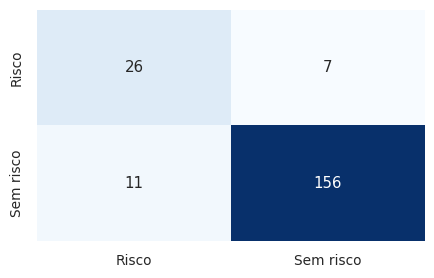

In [480]:
predictLogistic = modelLogistic.predict(x_test)

PerformanceMetrics(y_test, predictLogistic, ['Risco', 'Sem risco'])

### Relatório de Classificação para o Modelo Naive Bayes


Relatório de Classificação :

              precision    recall  f1-score   support

       Risco       0.46      0.67      0.54        33
   Sem Risco       0.93      0.84      0.88       167

    accuracy                           0.81       200
   macro avg       0.69      0.76      0.71       200
weighted avg       0.85      0.81      0.83       200

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 81.50%.
O modelo identificou corretamente 22 registros com o rótulo 'Risco'.
O modelo identificou corretamente 141 registros com o rótulo 'Sem risco'.


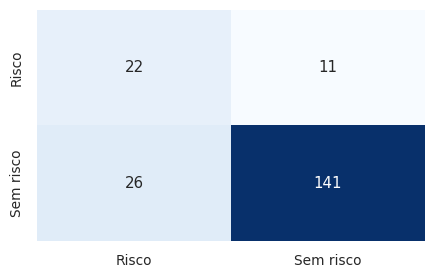

In [481]:
predictNB = modelNB.predict(x_test)

PerformanceMetrics(y_test, predictNB, ['Risco', 'Sem risco'])

### Relatório de Classificação para o Modelo de Árvore de Decisão


Relatório de Classificação :

              precision    recall  f1-score   support

       Risco       0.62      0.70      0.66        33
   Sem Risco       0.94      0.92      0.93       167

    accuracy                           0.88       200
   macro avg       0.78      0.81      0.79       200
weighted avg       0.89      0.88      0.88       200

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 88.00%.
O modelo identificou corretamente 23 registros com o rótulo 'Risco'.
O modelo identificou corretamente 153 registros com o rótulo 'Sem risco'.


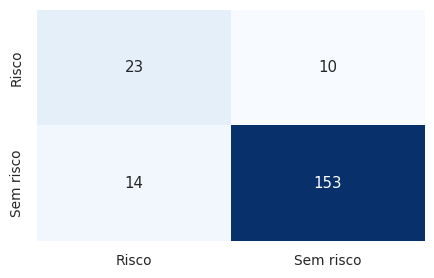

In [484]:
predictTree= modelTree.predict(x_test)

PerformanceMetrics(y_test, predictTree, ['Risco', 'Sem risco'])

### Relatório de Classificação para o Modelo Random Forest


Relatório de Classificação :

              precision    recall  f1-score   support

       Risco       0.77      0.70      0.73        33
   Sem Risco       0.94      0.96      0.95       167

    accuracy                           0.92       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.91      0.92      0.91       200

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 91.50%.
O modelo identificou corretamente 23 registros com o rótulo 'Risco'.
O modelo identificou corretamente 160 registros com o rótulo 'Sem risco'.


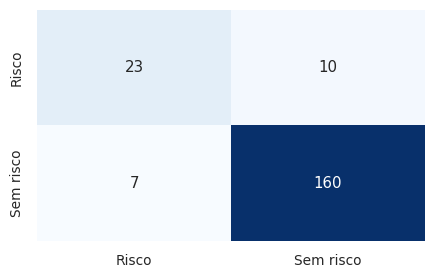

In [483]:
predictRF = modelRF.predict(x_test)

PerformanceMetrics(y_test, predictRF, ['Risco', 'Sem risco'])